In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
import re
import requests
import numpy as np
%matplotlib inline

In [2]:
"""
Plot a time series of year vs the number of articles obtained.

Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages of 

Obtain the top 10 universities and research centers based on number of citations.

Obtain the top 10% of countries that provide the most number of research. You can do 
this based on the categories already set in place.

Create a 2D area graph that shows how the percentage of each of the topics increases
over time. See Fig 3 from reference for guidance.

"""

'\nPlot a time series of year vs the number of articles obtained.\n\nPlot number of country of origin (from affiliations) vs number of publications (we might\nbe able to create a map of the world that shows the percentages of \n\nObtain the top 10 universities and research centers based on number of citations.\n\nObtain the top 10% of countries that provide the most number of research. You can do \nthis based on the categories already set in place.\n\nCreate a 2D area graph that shows how the percentage of each of the topics increases\nover time. See Fig 3 from reference for guidance.\n\n'

In [2]:
journals = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/journals.csv')
papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/papers/final_valid_papers.csv')
affiliations = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/affiliations/affiliations_metadata.csv')
kwords = pd.read_csv(os.getcwd().replace('scripts', 'data')+'/technical_buzzwords.csv')
words = pd.DataFrame(columns = ['topic', 'keywords'])
for i in range(kwords.shape[0]):
    words.loc[len(words.index)] = [kwords.iat[i,0], kwords.iat[i,1].split(", ")]
    
buzz_counts = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/buzz_counts_by_paper.csv')

occur_per_topic = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/occurrences_per_topic.csv')

buzzwords_in_papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/full_text/buzzwords_in_papers.csv')

contexts_papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/full_text/paper_contexts.csv')



    


In [3]:
contexts_papers


,paper_id,category,sub_word,buzz_id
0,0,Modeling,modeling,10
1,0,Modeling,modeling,10
2,0,Modeling,modeling,10
3,0,Modeling,modeling,10
4,0,Modeling,modeling,10
...,...,...,...,...
1111686,27399,Infrastructure as a Service (IaaS),databases,37
1111687,27399,Infrastructure as a Service (IaaS),databases,37
1111688,27399,Infrastructure as a Service (IaaS),databases,37
1111689,27399,Infrastructure as a Service (IaaS),databases,37


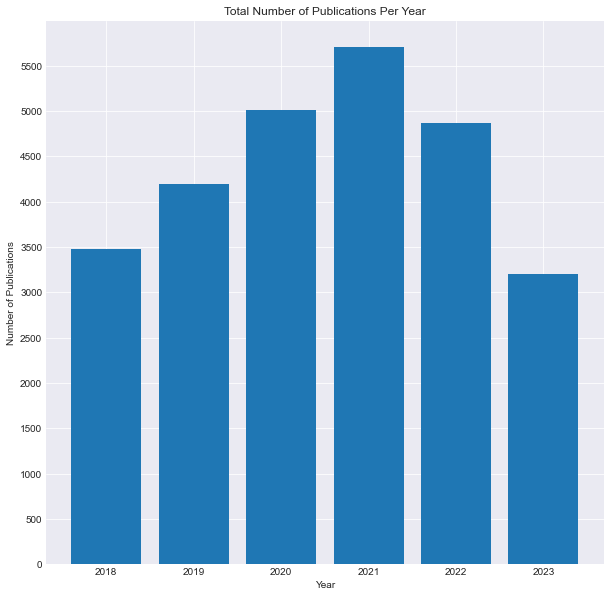

In [15]:
"""
Plot a time series of year vs the number of articles obtained.
"""
plt.figure(figsize = (10,10))
by_year = papers.groupby('year').count()
years = by_year.index.tolist()
cnts = by_year['journal_id'].tolist()
plt.yticks(np.arange(0, 6500, 500))
plt.style.use('seaborn-darkgrid')
plt.ylabel("Number of Publications")
plt.xlabel("Year")
plt.title("Total Number of Publications Per Year")
plt.bar(x = years, height = cnts)
plt.savefig('total_pubs_per_yr.png')

In [5]:
affiliations

,aff_id,eid,name,country,author_count,doc-count
0,60031268,10-s2.0-60031268,Daneshgahe Shahid Bahonar-e-Kerman,Iran,3834,14667
1,60007989,10-s2.0-60007989,Universiteit Utrecht,Netherlands,17385,103116
2,60022461,10-s2.0-60022461,Technical University of Crete,Greece,1640,9706
3,60104134,10-s2.0-60104134,Khalifa University of Science and Technology,United Arab Emirates,3159,21236
4,60025063,10-s2.0-60025063,KU Leuven,Belgium,26413,172551
...,...,...,...,...,...,...
12292,60030486,10-s2.0-60030486,"University of Idaho, Idaho Falls",United States,150,874
12293,108119111,10-s2.0-108119111,Health Department,United States,1,7
12294,119716405,10-s2.0-119716405,"A Division of RESPEC, INC",United States,0,3
12295,108152689,10-s2.0-108152689,Primodal Inc.,Canada,0,9


In [6]:
papers


,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104476,2023-08-01,S0309170823001112,2-s2.0-85161667219,8.516167e+10,0.0,25822520800,60025063,True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.020,2018-01-01,S1364815217304140,2-s2.0-85032268729,8.503227e+10,142.0,"34571084000, 55188785600, 33767605600, 5721638...","60016437:60012197:60012197:60012197, 60025278:...",True
26470,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.010,2018-01-01,S1364815216304005,2-s2.0-85032353211,8.503235e+10,54.0,"37111876100, 15069126500, 57189996027, 3574567...","60013141:60025182:60025182:60025182:60013141, ...",True
26471,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.08.002,2018-01-01,S1364815216309550,2-s2.0-85032684995,8.503268e+10,5.0,"7006615627, 49661600900, 15132591800, 66033150...","60021439:60030486, 109682148:60021439:60021439...",True
26472,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.011,2018-01-01,S136481521630843X,2-s2.0-85032736133,8.503274e+10,45.0,"56111768300, 37010006200, 43361846100, 5611302...",60068861:60020071:60068861:60024695:60102538:6...,True


In [63]:
"""Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages"""

countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co] = 1
        else:
            countries[co] +=1

sorted_countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}



In [13]:
pd.DataFrame(columns = ['country', 'publications'], data  = list(sorted_countries.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_pubs.csv', index = False)



In [140]:
sorted_countries.keys()

dict_keys(['China', 'United States', 'Australia', 'Canada', 'India', 'Germany', 'United Kingdom', 'Iran', 'France', 'Italy', 'Netherlands', 'Spain', 'South Korea', 'Brazil', 'Japan', 'Switzerland', 'Sweden', 'Norway', 'Hong Kong', 'Turkey', 'Denmark', 'Portugal', 'Belgium', 'Taiwan', 'Singapore', 'Poland', 'South Africa', 'Malaysia', 'Egypt', 'New Zealand', 'Austria', 'Saudi Arabia', 'Pakistan', 'Israel', 'Viet Nam', 'Mexico', 'Greece', 'Finland', 'Bangladesh', 'United Arab Emirates', 'Ethiopia', 'Russian Federation', 'Czech Republic', 'Nigeria', 'Thailand', 'Chile', 'Argentina', 'Ireland', 'Indonesia', 'Morocco', 'Colombia', 'Ghana', 'Tunisia', 'Croatia', 'Hungary', 'Qatar', 'Cyprus', 'Algeria', 'Oman', 'Kenya', 'Iraq', 'Macao', 'Tanzania', 'Nepal', 'Slovenia', 'Ecuador', 'Sri Lanka', 'Lebanon', 'Estonia', 'Slovakia', 'Serbia', 'Peru', 'Jordan', 'Kazakhstan', 'Luxembourg', 'Uganda', 'Costa Rica', 'Philippines', 'Uruguay', 'Cameroon', 'Kuwait', 'Ukraine', 'Lithuania', 'Benin', 'Georgia

In [143]:
for i in range(len(sorted_countries.keys())):
    print(str(list(sorted_countries.keys())[i])+ " "+
    str(list(sorted_countries.values())[i]/papers.shape[0]))


China 0.4104782050313515
United States 0.20729772607086197
Australia 0.06444058321371912
Canada 0.053373120797763844
India 0.052655435521643874
Germany 0.04408098511747375
United Kingdom 0.040945833648107575
Iran 0.03667749490065725
France 0.034902168164992066
Italy 0.034826622346453125
Netherlands 0.034071164161063684
Spain 0.03399561834252474
South Korea 0.03131374178439223
Brazil 0.023721387021228377
Japan 0.023003701745108407
Switzerland 0.016695625897106596
Sweden 0.01541134698194455
Norway 0.013938203520435144
Hong Kong 0.013522701518470953
Turkey 0.013220518244315178
Denmark 0.01250283296819521
Portugal 0.012087330966231019
Belgium 0.011974012238422604
Taiwan 0.011822920601344716
Singapore 0.011558510236458413
Poland 0.010878597869607917
South Africa 0.010009820956410063
Malaysia 0.009669864772984815
Egypt 0.00917881695248168
New Zealand 0.008876633678325904
Austria 0.008310040039283826
Saudi Arabia 0.00800785676512805
Pakistan 0.007592354763163859
Israel 0.0075168089446249154
V

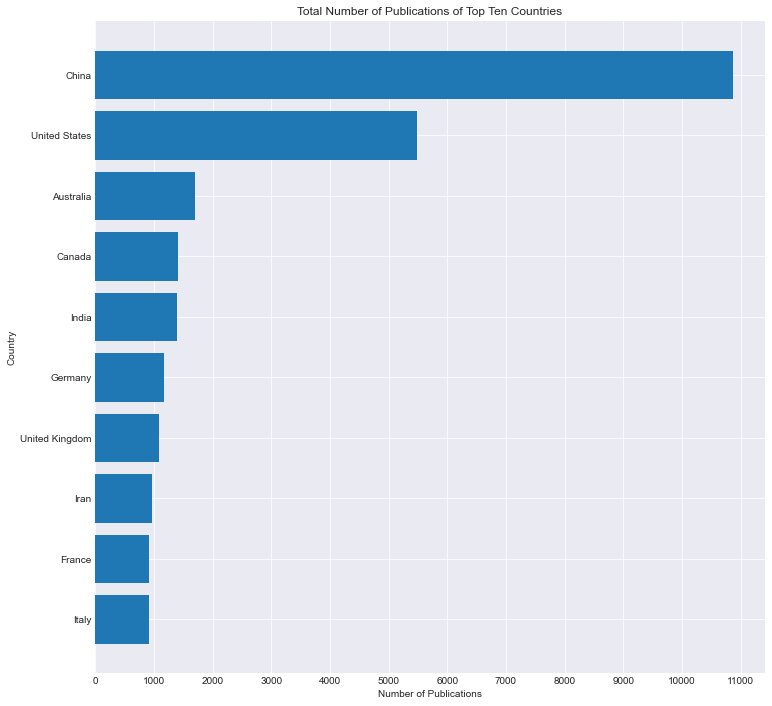

In [64]:
countries = list(sorted_countries.keys())[:10]
pubs = list(sorted_countries.values())[:10]

plt.figure(figsize = (12,12))
plt.barh(countries, pubs)

plt.xticks(np.arange(0, 12000, 1000))
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.title("Total Number of Publications of Top Ten Countries")
plt.ylabel("Country")
plt.xlabel("Number of Publications")
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])
plt.savefig('total_pubs_t10_countries.png')
plt.show()


In [29]:
"""
Obtain the top 10 universities and research centers based on number of citations.
"""
pubs = {}
for i in set(papers.index.tolist()):
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    for aff in set(aff_list):
        if aff not in pubs.keys():
            pubs[aff] = papers.loc[i]['citations']
        else:
            pubs[aff] +=papers.loc[i]['citations']

sorted_aff_pubs = {k: v for k, v in sorted(pubs.items(), key=lambda item: item[1], reverse = True)}



In [251]:
sorted_aff_pubs

{'60027363': 11347.0,
 '60025278': 10511.0,
 '60019616': 10180.0,
 '60073652': 9427.0,
 '60010851': 9341.0,
 '60031041': 9074.0,
 '60019499': 7783.0,
 '60029306': 7015.0,
 '60033100': 6976.0,
 '60032356': 6639.0,
 '60023237': 6215.0,
 '60010689': 6133.0,
 '60021182': 6116.0,
 '60017161': 5812.0,
 '60020547': 5564.0,
 '60013551': 5475.0,
 '60004156': 5149.0,
 '60031004': 5141.0,
 '60014966': 5058.0,
 '60019533': 5027.0,
 '60004538': 4979.0,
 '60025084': 4783.0,
 '60003353': 4716.0,
 '60028333': 4643.0,
 '60007155': 4560.0,
 '60023932': 4223.0,
 '60031150': 4201.0,
 '60006019': 4190.0,
 '60006288': 4114.0,
 '60002612': 3993.0,
 '60025761': 3922.0,
 '60023380': 3720.0,
 '60005488': 3705.0,
 '60022422': 3572.0,
 '60027277': 3385.0,
 '60029322': 3318.0,
 '60022927': 3249.0,
 '60004956': 3168.0,
 '60000221': 3126.0,
 '60118763': 3082.0,
 '60008592': 2995.0,
 '60016521': 2985.0,
 '60012708': 2951.0,
 '60026981': 2920.0,
 '60022414': 2911.0,
 '60087826': 2866.0,
 '60017456': 2860.0,
 '60018229

In [18]:
pd.DataFrame(columns = ['affiliation', 'citations'], data  = list(sorted_pubs.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/affiliation_citations.csv', index = False)




In [30]:
best_affs = list(sorted_aff_pubs.items())[:10]

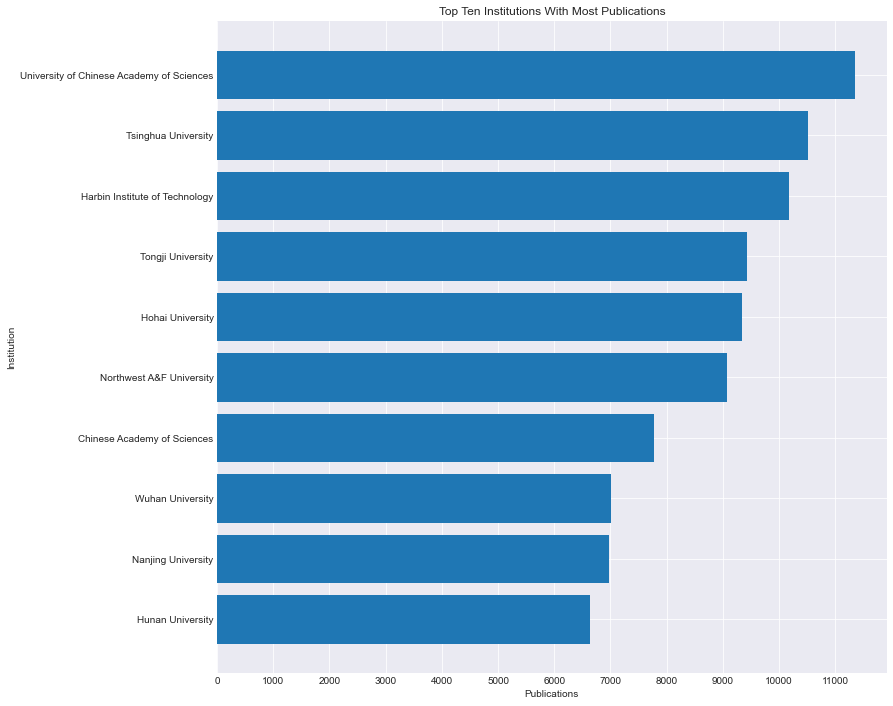

In [31]:
pubs = list(v[1] for v in best_affs)
affils = [affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]

plt.figure(figsize = (12,12))
plt.barh(affils, pubs)

plt.xticks(np.arange(0, 12000, 1000))
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.title("Top Ten Institutions With Most Publications")
plt.ylabel("Institution")
plt.xlabel("Publications")
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])
plt.savefig('total_pubs_t10_affs.png')
plt.show()



In [254]:
[affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]

['University of Chinese Academy of Sciences',
 'Tsinghua University',
 'Harbin Institute of Technology',
 'Tongji University',
 'Hohai University',
 'Northwest A&F University',
 'Chinese Academy of Sciences',
 'Wuhan University',
 'Nanjing University',
 'Hunan University']

In [119]:
[affiliations[affiliations['aff_id']==int(aff[0])] for aff in best_affs]

[       aff_id               eid                      name country  \
 275  60031041  10-s2.0-60031041  Northwest A&F University   China   
 
      author_count  doc-count  
 275         27777      47571  ,
       aff_id               eid              name country  author_count  \
 18  60010851  10-s2.0-60010851  Hohai University   China         19513   
 
     doc-count  
 18      58470  ,
       aff_id               eid                                       name  \
 31  60027363  10-s2.0-60027363  University of Chinese Academy of Sciences   
 
    country  author_count  doc-count  
 31   China         79023     296208  ,
       aff_id               eid              name country  author_count  \
 81  60029306  10-s2.0-60029306  Wuhan University   China         53311   
 
     doc-count  
 81     157339  ,
        aff_id               eid                           name country  \
 330  60013551  10-s2.0-60013551  China Agricultural University   China   
 
      author_count  doc-count 

In [17]:
"""
Obtain the top 10% of countries that provide the most number of research. You can do 
this based on the categories already set in place.contry vs.citations
"""

'\nObtain the top 10% of countries that provide the most number of research. You can do \nthis based on the categories already set in place.\n\n'

In [101]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104476,2023-08-01,S0309170823001112,2-s2.0-85161667219,8.516167e+10,0.0,25822520800,60025063,True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.020,2018-01-01,S1364815217304140,2-s2.0-85032268729,8.503227e+10,142.0,"34571084000, 55188785600, 33767605600, 5721638...","60016437:60012197:60012197:60012197, 60025278:...",True
26470,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.010,2018-01-01,S1364815216304005,2-s2.0-85032353211,8.503235e+10,54.0,"37111876100, 15069126500, 57189996027, 3574567...","60013141:60025182:60025182:60025182:60013141, ...",True
26471,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.08.002,2018-01-01,S1364815216309550,2-s2.0-85032684995,8.503268e+10,5.0,"7006615627, 49661600900, 15132591800, 66033150...","60021439:60030486, 109682148:60021439:60021439...",True
26472,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.011,2018-01-01,S136481521630843X,2-s2.0-85032736133,8.503274e+10,45.0,"56111768300, 37010006200, 43361846100, 5611302...",60068861:60020071:60068861:60024695:60102538:6...,True


In [32]:
countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co]=0
        
        countries[co]+=papers.iloc[i,9]

In [20]:
countries

{'Iran': 18123.0,
 'Netherlands': 18363.0,
 'United Arab Emirates': 2248.0,
 'Greece': 2311.0,
 'Belgium': 5762.0,
 'United States': 93584.0,
 'Canada': 21929.0,
 'China': 201343.0,
 'Poland': 3808.0,
 'Switzerland': 9127.0,
 'Australia': 34034.0,
 'Italy': 16605.0,
 'Denmark': 6443.0,
 'France': 12598.0,
 'Germany': 22272.0,
 'Taiwan': 4795.0,
 'Japan': 9914.0,
 'Spain': 14035.0,
 'South Korea': 13805.0,
 'Ghana': 1014.0,
 'India': 24267.0,
 'Russian Federation': 1527.0,
 'Oman': 1005.0,
 'Austria': 4179.0,
 'Morocco': 1263.0,
 'United Kingdom': 19590.0,
 'Sweden': 6906.0,
 'Brazil': 8097.0,
 'Singapore': 11458.0,
 'Norway': 6990.0,
 'Indonesia': 1238.0,
 'Finland': 3868.0,
 'New Zealand': 3715.0,
 'Nepal': 636.0,
 'Saudi Arabia': 3764.0,
 'Israel': 2996.0,
 'Luxembourg': 379.0,
 'Mexico': 2122.0,
 'Colombia': 993.0,
 'Democratic Republic Congo': 60.0,
 'South Africa': 3032.0,
 'Argentina': 1318.0,
 'Lebanon': 433.0,
 'Egypt': 4435.0,
 'Qatar': 1587.0,
 'Hong Kong': 8146.0,
 'Banglade

In [33]:
sorted_countries_citations = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}


In [24]:
pd.DataFrame(columns = ['country', 'citations'], data  = list(sorted_countries_citations.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_citations.csv', index = False)



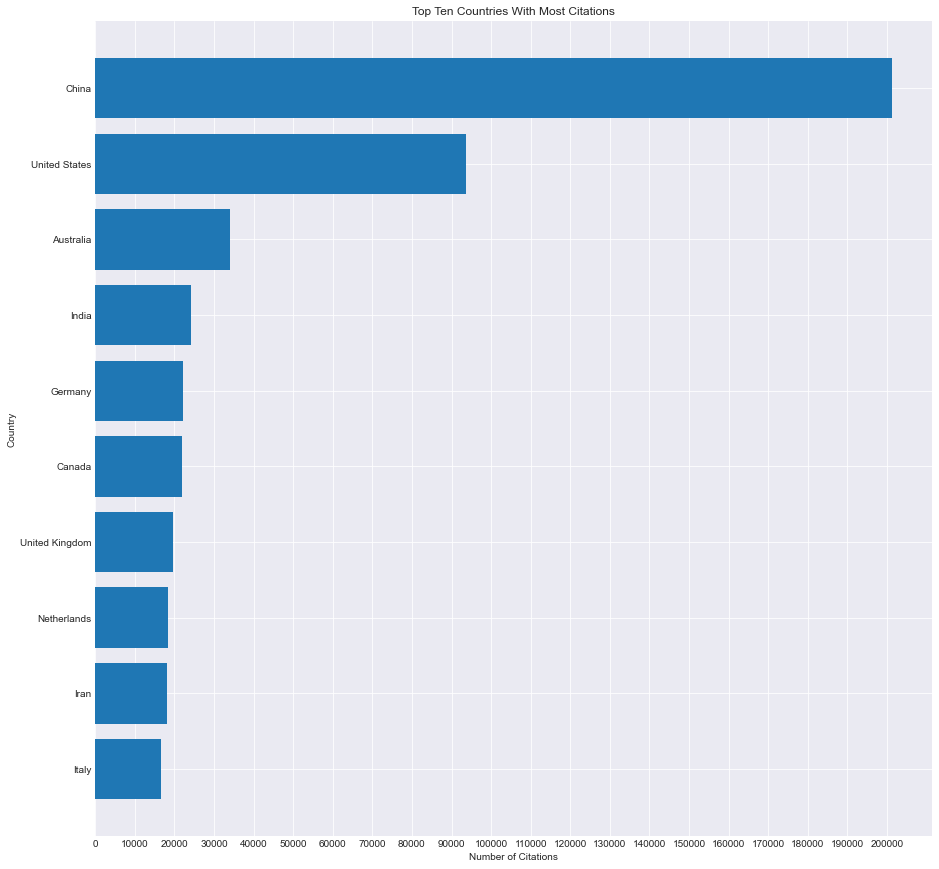

In [34]:
cits = list(sorted_countries_citations.values())[:10]
counts = list(sorted_countries_citations.keys())[:10]

plt.figure(figsize = (15,15))
plt.barh(counts, cits)

plt.xticks(np.arange(0, 210000, 10000))
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.ylabel("Country")
plt.xlabel("Number of Citations")
plt.title("Top Ten Countries With Most Citations")
plt.savefig('total_cits_t10_countries.png')
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])

plt.show()

In [23]:
sorted_countries_citations


{'China': 201343.0,
 'United States': 93584.0,
 'Australia': 34034.0,
 'India': 24267.0,
 'Germany': 22272.0,
 'Canada': 21929.0,
 'United Kingdom': 19590.0,
 'Netherlands': 18363.0,
 'Iran': 18123.0,
 'Italy': 16605.0,
 'Spain': 14035.0,
 'South Korea': 13805.0,
 'France': 12598.0,
 'Singapore': 11458.0,
 'Japan': 9914.0,
 'Switzerland': 9127.0,
 'Hong Kong': 8146.0,
 'Brazil': 8097.0,
 'Norway': 6990.0,
 'Turkey': 6914.0,
 'Sweden': 6906.0,
 'Portugal': 6843.0,
 'Denmark': 6443.0,
 'Viet Nam': 5813.0,
 'Belgium': 5762.0,
 'Malaysia': 5418.0,
 'Taiwan': 4795.0,
 'Egypt': 4435.0,
 'Austria': 4179.0,
 'Finland': 3868.0,
 'Poland': 3808.0,
 'Saudi Arabia': 3764.0,
 'Pakistan': 3760.0,
 'New Zealand': 3715.0,
 'South Africa': 3032.0,
 'Israel': 2996.0,
 'Bangladesh': 2401.0,
 'Greece': 2311.0,
 'United Arab Emirates': 2248.0,
 'Mexico': 2122.0,
 'Ireland': 1966.0,
 'Czech Republic': 1929.0,
 'Ethiopia': 1838.0,
 'Cyprus': 1684.0,
 'Thailand': 1659.0,
 'Nigeria': 1596.0,
 'Qatar': 1587.0,


In [114]:
affiliations

,aff_id,eid,name,country,author_count,doc-count
0,60031268,10-s2.0-60031268,Daneshgahe Shahid Bahonar-e-Kerman,Iran,3834,14667
1,60007989,10-s2.0-60007989,Universiteit Utrecht,Netherlands,17385,103116
2,60022461,10-s2.0-60022461,Technical University of Crete,Greece,1640,9706
3,60104134,10-s2.0-60104134,Khalifa University of Science and Technology,United Arab Emirates,3159,21236
4,60025063,10-s2.0-60025063,KU Leuven,Belgium,26413,172551
...,...,...,...,...,...,...
12292,60030486,10-s2.0-60030486,"University of Idaho, Idaho Falls",United States,150,874
12293,108119111,10-s2.0-108119111,Health Department,United States,1,7
12294,119716405,10-s2.0-119716405,"A Division of RESPEC, INC",United States,0,3
12295,108152689,10-s2.0-108152689,Primodal Inc.,Canada,0,9


In [ ]:
# countries total percent pubs

In [39]:
percent_pubs_countries = pd.DataFrame(columns = list(set(affiliations['country'].tolist()))) 


In [40]:
for j in range(2018,2024):
    countries = {}
    
    for co in list(set(affiliations['country'].tolist())):
        countries[co] = 0
    
    papers_tmp = papers[papers['year']==j]
    
    total_pubs = len(papers_tmp.index)
    
    for i in set(papers_tmp.index.tolist()):
    #     print(i)
        aff_list = re.split(':|, ',papers_tmp.loc[i]['affiliations'])

        try:
            countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
        except Exception as e:
    #         broken.append(i)
            continue

    #     print(countries_list)
        for co in set(countries_list):
            countries[co]+=1/total_pubs
            
    percent_pubs_countries.loc[len(percent_pubs_countries.index)] = countries.values()

    
    

In [41]:
sorted_pubs = percent_pubs_countries[percent_pubs_countries.sum().sort_values(ascending=False).index]


In [42]:
sorted_pubs

,China,United States,Australia,Canada,India,Germany,United Kingdom,Iran,France,Italy,...,Azerbaijan,Bahamas,Lesotho,Moldova,French Polynesia,Turkmenistan,Tajikistan,Barbados,Congo,Romania
0,0.311009,0.259845,0.078183,0.056913,0.049439,0.055188,0.046565,0.027307,0.039092,0.047140,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.367405,0.223493,0.061711,0.049797,0.050751,0.046700,0.042173,0.044794,0.036216,0.035978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.387560,0.217105,0.060207,0.049242,0.059609,0.039474,0.036085,0.043860,0.038477,0.032496,...,0.000000,0.000000,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.0,0.0
3,0.424094,0.191210,0.066888,0.056558,0.051655,0.041674,0.038172,0.038522,0.030468,0.035020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000175,0.000175,0.000175,0.0,0.0
4,0.464146,0.185741,0.064927,0.056092,0.050544,0.046435,0.042531,0.034724,0.031847,0.029176,...,0.000205,0.000205,0.000205,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.504994,0.175094,0.054619,0.050874,0.052747,0.036517,0.043383,0.024657,0.035581,0.031835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [40]:
pd.DataFrame(columns = ['country', 'percent_pubs'], data  = list(sorted_pubs.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_percent_pubs.csv', index = False)




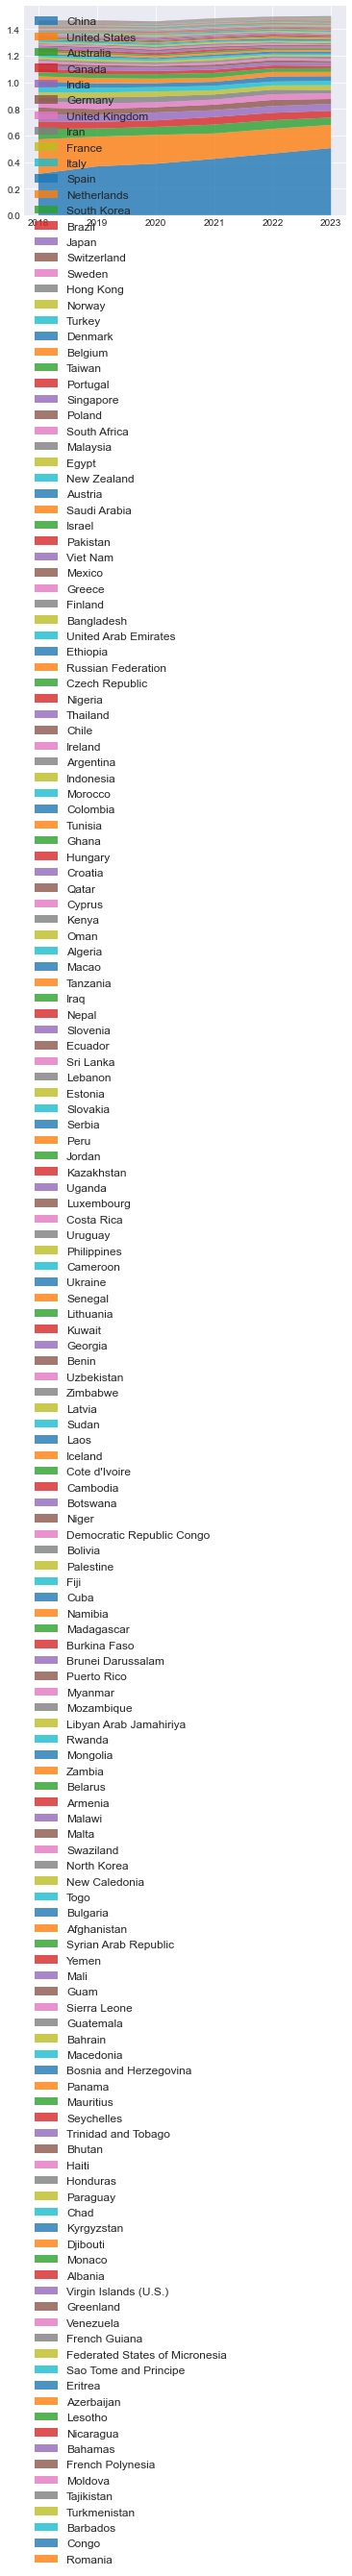

In [265]:
#All individual words
plt.stackplot([int(x + 2018) for x in sorted_pubs.index],
              [sorted_pubs[c] for c in sorted_pubs.columns],
              labels=sorted_pubs.columns.tolist(),
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.show()

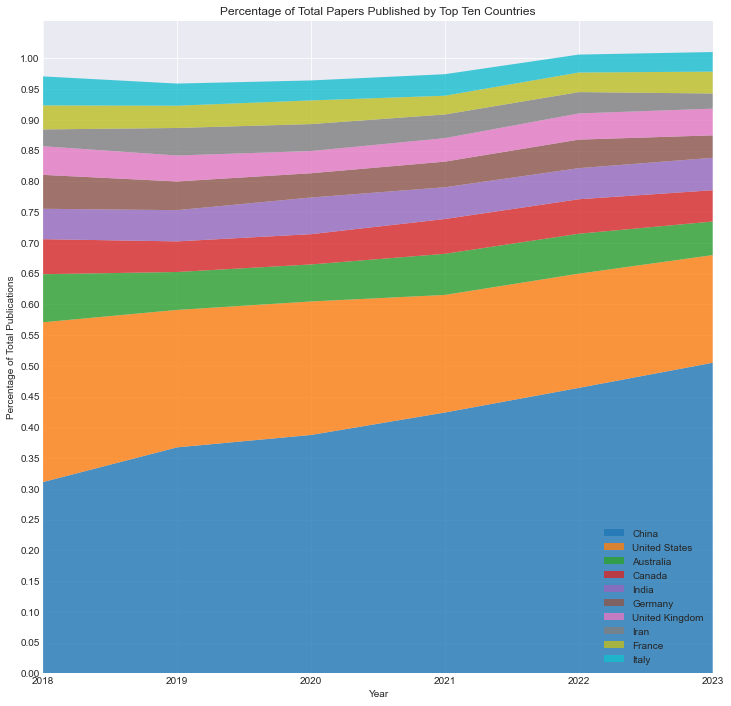

In [52]:
plt.figure(figsize = (12,12))
plt.stackplot([int(x + 2018) for x in sorted_pubs.index],
              [sorted_pubs[c] for c in sorted_pubs.iloc[:, : 10]],
              labels=sorted_pubs.columns.tolist()[:10],
              alpha=0.8)
plt.style.use('seaborn-darkgrid')
# plt.gca().invert_yaxis()
plt.title("Percentage of Total Papers Published by Top Ten Countries")

plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylabel("Percentage of Total Publications")
plt.xlabel("Year")

# plt.legend(loc=2, fontsize='large')
# plt.gca().invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')
plt.margins(x=0)
plt.savefig('percent_pubs_t10_countries.png')
plt.show()

In [18]:
"""
Create a 2D area graph that shows how the percentage of each of the topics increases
over time. See Fig 3 from reference for guidance.
"""

'\nCreate a 2D area graph that shows how the percentage of each of the topics increases\nover time. See Fig 3 from reference for guidance.\n'

In [53]:
counts_years = pd.DataFrame(columns = [i for i in range(38)])

In [54]:
#area graph by year 
for i in range(2018, 2024):
    by_year = papers[papers['year']==i]
    
    numbers_by_year = []
    
    for paper_i in by_year.index.tolist():
        
        l = buzz_counts.loc[paper_i].tolist()
        for i in range(len(l)):
            if l[i] !=0:
                l[i] = 1
                
        numbers_by_year.append(l)
#     print(numbers_by_year)
    
    counts_years.loc[len(counts_years.index)] = [sum(x) for x in zip(*numbers_by_year)]

In [55]:
sorted_counts_years = counts_years[counts_years.sum().sort_values(ascending=False).index]



In [131]:
sorted_counts_years[2]



0     99
1    135
2    164
3    191
4    182
5    115
Name: 2, dtype: int64

In [ ]:
sorted_counts_years.iloc[:, : 10]

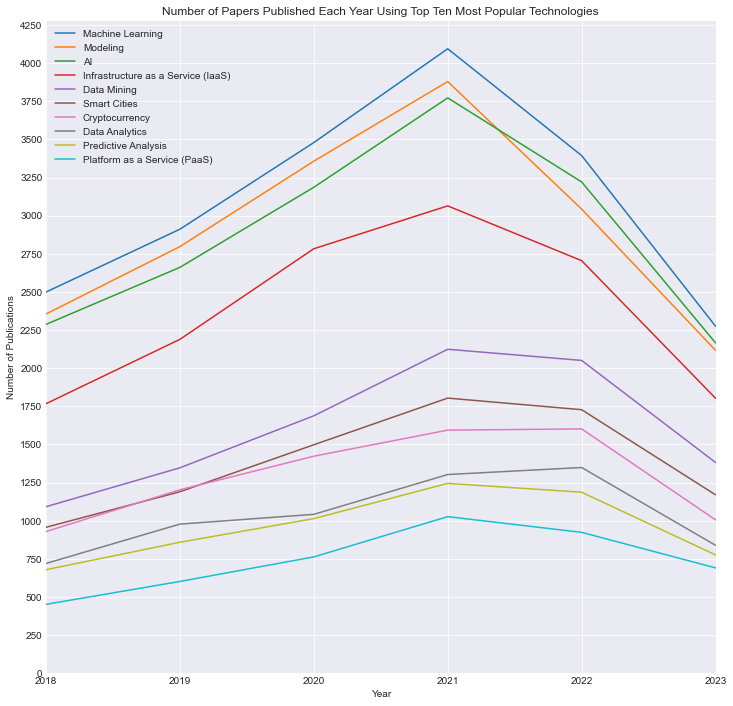

In [59]:
plt.figure(figsize = (12,12))

for i in sorted_counts_years.columns[:10]:
    plt.plot(range(2018,2024), sorted_counts_years[i], label = words.iat[i,0])
plt.style.use('seaborn-darkgrid')
plt.title("Number of Papers Published Each Year Using Top Ten Most Popular Technologies")

plt.ylabel("Number of Publications")
plt.xlabel("Year")
# plt.legend(loc=2, fontsize='large')
# plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 4500, 250))
plt.margins(x=0)
plt.legend(loc='upper left')
plt.savefig('topic_trends.png')
plt.show()

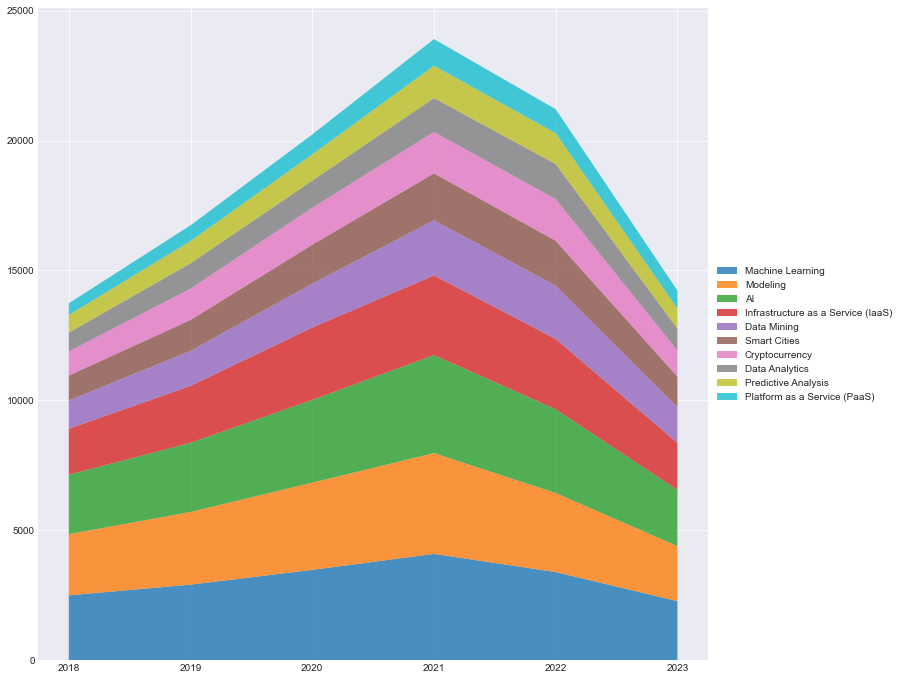

In [268]:
#All individual words GARBAGE
plt.figure(figsize = (12,12))
plt.stackplot([int(x + 2018) for x in counts_years.index],
              [sorted_counts_years[i] for i in sorted_counts_years.iloc[:, : 10]],
              labels=[words.iat[i,0] for i in sorted_counts_years.iloc[:, : 10]],
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [80]:
buzzwords_in_papers = buzzwords_in_papers.drop(buzzwords_in_papers[buzzwords_in_papers['sub_word']=='dapp'].index.tolist())
                         

In [81]:
buzzwords_in_papers.drop(buzzwords_in_papers[buzzwords_in_papers['category']=='blockchain'].index.tolist())


,paper_id,category,sub_word,buzz_id
0,0,Modeling,modeling,10
1,0,Modeling,modeling,10
2,0,Modeling,modeling,10
3,0,Modeling,modeling,10
4,0,Modeling,modeling,10
...,...,...,...,...
1111686,27399,Infrastructure as a Service (IaaS),databases,37
1111687,27399,Infrastructure as a Service (IaaS),databases,37
1111688,27399,Infrastructure as a Service (IaaS),databases,37
1111689,27399,Infrastructure as a Service (IaaS),databases,37


In [90]:
contexts_papers

,context
0,rated porous media hydrodynamic dispersion inv...
1,ity reaches a maximum value and then decreases...
2,additionally many attempts have been made us...
3,s the effects of grain heterogeneity will aid ...
4,edia at the pore scale there are two commonly...
...,...
1111706,e highly important for modelling of wrrfs are ...
1111707,eviation from the experimental results table 7...
1111708,fig 7 remark that the main precipitate fou...
1111709,improvement of model simulation speed was obta...


In [87]:
set(buzzwords_in_papers[buzzwords_in_papers['category']=='Blockchain']['sub_word'].tolist())


{'blockchain',
 'decentralization',
 'decentralized application',
 'digital asset',
 'dpos',
 'security token',
 'smart contracts',
 'solidity',
 'staking',
 'tokenization',
 'yield farming'}

In [ ]:
#by topic

In [72]:
buzz_counts

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,1,0,0,0,0,0,65,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,8,0,0,0,0,0,9,1,4,0,...,5,5,0,0,0,0,0,0,1,2
26470,2,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,1,4
26471,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,6
26472,1,0,0,0,0,0,3,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [161]:
"""
number of buzzwords in each paper
"""

'\nnumber of buzzwords in each paper\n'

In [46]:
occur_per_topic

,count
0,192873
1,9386
2,2496
3,4624
4,453
5,3072
6,253827
7,7878
8,31423
9,7589


In [60]:
#country vs #articles by year
"""Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages"""

countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co] = [0]*6
        
        countries[co][papers.iat[i,2]-2018] +=1

sorted_countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}



In [5]:
sorted_countries

{'China': [1082, 1542, 1944, 2422, 2259, 1618],
 'United States': [904, 938, 1089, 1092, 904, 561],
 'Australia': [272, 259, 302, 382, 316, 175],
 'Canada': [198, 209, 247, 323, 273, 163],
 'Germany': [192, 196, 198, 238, 226, 117],
 'India': [172, 213, 299, 295, 246, 169],
 'Italy': [164, 151, 163, 200, 142, 102],
 'United Kingdom': [162, 177, 181, 218, 207, 139],
 'France': [136, 152, 193, 174, 155, 114],
 'Netherlands': [132, 161, 167, 175, 165, 102],
 'Spain': [128, 144, 153, 172, 187, 116],
 'South Korea': [102, 128, 171, 203, 132, 93],
 'Iran': [95, 188, 220, 220, 169, 79],
 'Brazil': [87, 122, 115, 142, 108, 54],
 'Japan': [87, 101, 125, 122, 108, 66],
 'Switzerland': [72, 62, 71, 99, 86, 52],
 'Sweden': [65, 55, 63, 96, 74, 55],
 'Norway': [57, 66, 67, 101, 51, 27],
 'Singapore': [53, 69, 64, 53, 41, 26],
 'Taiwan': [48, 52, 52, 70, 54, 37],
 'Turkey': [45, 73, 67, 86, 43, 36],
 'Belgium': [45, 53, 60, 73, 52, 34],
 'Portugal': [42, 55, 78, 82, 38, 25],
 'New Zealand': [42, 41,

In [88]:
x = [i for i in range(2018,2024)]

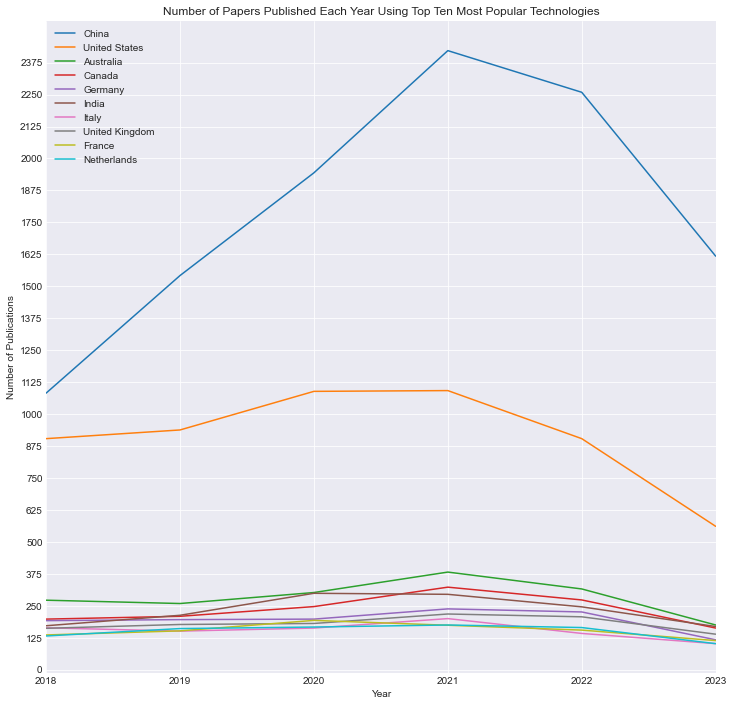

In [61]:
plt.figure(figsize = (12,12))
for p in list(sorted_countries.items())[:10]:
    plt.plot(range(2018, 2024), p[1], label = p[0])

plt.xlabel("Year")
plt.ylabel("Number of publications")
# plt.style.use('seaborn-darkgrid')
plt.title("Number of Papers Published Each Year Using Top Ten Most Popular Technologies")
plt.savefig('papers_countries_per_year.png')
# plt.legend(loc=2, fontsize='large')
plt.ylabel("Number of Publications")
plt.xlabel("Year")
# plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 2500, 125))
plt.margins(x=0)
plt.legend(loc='upper left')
plt.show()

In [150]:
words

,topic,keywords
0,AI,"[Reinforcement Learning, Supervised Learning, ..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain,"[Blockchain, Ethereum, Smart Contracts, Decent..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,VR,"[Virtual Reality, Immersive Gaming, Virtual To..."
5,AR,"[Google Glass, Microsoft HoloLens, AR in Marke..."
6,Machine Learning,"[Machine Learning, Scikit-Learn, TensorFlow, P..."
7,Cybersecurity,"[Cybersecurity, Ethical Hacking, Intrusion Det..."
8,Cryptocurrency,"[Cryptocurrency, Bitcoin, Ethereum, Litecoin, ..."
9,Automation,"[Automation, Industrial Automation, Home Autom..."


In [148]:
# words used together

buzzwords_in_papers[buzz]


,paper_id,category,sub_word,buzz_id
0,0,Modeling,modeling,10
1,0,Modeling,modeling,10
2,0,Modeling,modeling,10
3,0,Modeling,modeling,10
4,0,Modeling,modeling,10
...,...,...,...,...
1111686,27399,Infrastructure as a Service (IaaS),databases,37
1111687,27399,Infrastructure as a Service (IaaS),databases,37
1111688,27399,Infrastructure as a Service (IaaS),databases,37
1111689,27399,Infrastructure as a Service (IaaS),databases,37


In [152]:
j = 0

for i in set(buzzwords_in_papers['paper_id'].tolist()):
    tmp = buzzwords_in_papers[buzzwords_in_papers['paper_id']== i]
    
    words_used = set(tmp['category'].tolist())
    
    if('Machine Learning' in words_used and 'AI' in words_used):
        j+=1
        print(i)
    
print(j)

2
3
4
7
9
10
11
12
13
14
17
18
19
20
21
23
24
25
26
27
29
30
31
32
33
34
35
37
38
40
42
43
44
45
46
47
50
53
54
55
56
57
58
60
64
65
66
67
68
69
71
72
74
75
76
77
78
79
80
84
85
86
87
88
90
92
94
95
96
97
98
100
102
103
107
108
109
110
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
131
132
133
134
135
137
139
140
141
142
143
145
146
147
149
152
153
155
158
159
160
162
163
164
165
167
170
171
172
174
177
178
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
202
203
205
206
207
208
209
210
213
214
215
216
217
218
220
221
222
223
225
226
227
228
229
230
232
233
234
235
236
237
238
239
240
241
246
247
249
250
251
252
254
255
256
257
258
259
260
261
262
263
264
266
267
268
269
270
271
272
276
277
279
281
283
284
286
288
289
290
291
292
293
294
295
297
298
299
300
301
303
304
305
306
309
312
313
314
315
316
317
318
319
320
321
323
324
327
328
330
331
333
334
336
337
338
339
340
341
342
344
347
349
350
351
354
355
356
358
360
361
362
363
364


2785
2786
2787
2788
2789
2790
2791
2792
2795
2796
2797
2798
2799
2800
2801
2803
2805
2806
2807
2808
2809
2810
2812
2814
2815
2817
2818
2819
2822
2823
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2836
2837
2838
2840
2841
2842
2844
2845
2846
2847
2848
2849
2850
2851
2853
2854
2855
2856
2857
2858
2859
2860
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2889
2890
2891
2893
2894
2895
2896
2897
2898
2899
2900
2901
2903
2904
2905
2906
2907
2908
2912
2913
2914
2915
2916
2917
2918
2919
2920
2922
2925
2927
2928
2931
2932
2933
2934
2935
2937
2938
2939
2940
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2954
2955
2956
2957
2958
2959
2960
2961
2963
2966
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2980
2981
2982
2983
2985
2986
2988
2989
2990
2991
2993
2994
2995
2996
2997
2999
3000
3002
3004
3005
3006
3008
3009
3010
3011
3012
3014
3015
3016
3018
3019
3020
3021
3023
3025
3026
3028
3030
3031
3032
3033
3034


KeyboardInterrupt: 

In [153]:
pairs = {}

In [156]:
for i in set(buzzwords_in_papers['paper_id'].tolist()):
    tmp = buzzwords_in_papers[buzzwords_in_papers['paper_id']== i]
    
    words_used = set(tmp['category'].tolist())
    for j in range(38):
        for k in range(j+1, 38):

            if words.iat[j,0] in words_used and words.iat[k,0] in words_used:
                if (j,k) not in pairs.keys():
                    pairs[(j,k)] = 0
                pairs[(j,k)] +=1

In [157]:
pairs

{(10, 18): 604,
 (0, 6): 17138,
 (0, 10): 13181,
 (0, 37): 9408,
 (6, 10): 14353,
 (6, 37): 10120,
 (10, 37): 9311,
 (0, 8): 4711,
 (0, 24): 9239,
 (6, 8): 5049,
 (6, 24): 9348,
 (8, 10): 4663,
 (8, 24): 2550,
 (10, 24): 7284,
 (24, 37): 5623,
 (5, 8): 490,
 (5, 10): 1151,
 (5, 37): 906,
 (8, 37): 4236,
 (0, 27): 2373,
 (0, 36): 3774,
 (6, 27): 2375,
 (6, 36): 3903,
 (10, 27): 2194,
 (10, 36): 3624,
 (24, 27): 2071,
 (24, 36): 2910,
 (27, 36): 2357,
 (27, 37): 2368,
 (36, 37): 3861,
 (0, 5): 1088,
 (5, 6): 1169,
 (0, 9): 1986,
 (0, 29): 5725,
 (6, 9): 2155,
 (6, 29): 6140,
 (9, 10): 2115,
 (9, 29): 910,
 (10, 29): 5762,
 (0, 16): 4507,
 (0, 25): 4291,
 (0, 26): 2005,
 (0, 30): 711,
 (5, 16): 426,
 (5, 24): 610,
 (5, 25): 391,
 (5, 26): 181,
 (5, 27): 173,
 (5, 29): 538,
 (5, 30): 70,
 (5, 36): 321,
 (6, 16): 4676,
 (6, 25): 4498,
 (6, 26): 2091,
 (6, 30): 758,
 (10, 16): 3755,
 (10, 25): 3920,
 (10, 26): 1753,
 (10, 30): 713,
 (16, 24): 3174,
 (16, 25): 2092,
 (16, 26): 951,
 (16, 27):

In [185]:
pair_df = pd.DataFrame(columns = range(38))

for i in range(38):
    pair_df.loc[len(pair_df.index)] = [0]*38
    

In [184]:
len(vals)

38

In [186]:
vals = set()

for k,v in pairs.items():
    vals.add(k[0])
    vals.add(k[1])

In [187]:
for k,v in pairs.items():
    pair_df.iat[k[0], k[1]] = v/papers.shape[0]
    pair_df.iat[k[1], k[0]] = v/papers.shape[0]

In [188]:
pair_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.121969,0.020888,0.045781,0.002757,0.041097,0.647352,0.066820,0.177948,0.075017,...,0.089106,0.216250,0.026857,0.000038,0.059983,0.002909,0.018244,0.020700,0.142555,0.355368
1,0.121969,0.000000,0.005666,0.022022,0.001398,0.010236,0.129486,0.018358,0.041286,0.022324,...,0.032409,0.060134,0.008688,0.000000,0.031956,0.001889,0.018886,0.025346,0.057339,0.094999
2,0.020888,0.005666,0.000000,0.003173,0.000189,0.002531,0.023457,0.003173,0.011823,0.004193,...,0.003702,0.012541,0.001360,0.000000,0.002682,0.000189,0.001398,0.001247,0.006119,0.017867
3,0.045781,0.022022,0.003173,0.000000,0.000642,0.006157,0.049445,0.008801,0.021719,0.015336,...,0.012012,0.060286,0.003777,0.000038,0.008159,0.001095,0.009443,0.007403,0.026479,0.042079
4,0.002757,0.001398,0.000189,0.000642,0.000000,0.001398,0.002795,0.000453,0.000944,0.001020,...,0.000642,0.001549,0.000264,0.000000,0.000604,0.000227,0.000264,0.000529,0.001586,0.002191
5,0.041097,0.010236,0.002531,0.006157,0.001398,0.000000,0.044157,0.006610,0.018509,0.007743,...,0.008726,0.020322,0.002644,0.000000,0.005553,0.000264,0.002946,0.003135,0.012125,0.034222
6,0.647352,0.129486,0.023457,0.049445,0.002795,0.044157,0.000000,0.070975,0.190715,0.081401,...,0.094583,0.231926,0.028632,0.000038,0.062439,0.003211,0.020851,0.023608,0.147428,0.382262
7,0.066820,0.018358,0.003173,0.008801,0.000453,0.006610,0.070975,0.000000,0.024703,0.010576,...,0.017867,0.033656,0.013183,0.000000,0.010992,0.000869,0.003664,0.004986,0.024779,0.056131
8,0.177948,0.041286,0.011823,0.021719,0.000944,0.018509,0.190715,0.024703,0.000000,0.021455,...,0.037320,0.095943,0.009179,0.000038,0.023306,0.001284,0.009103,0.010388,0.043628,0.160006
9,0.075017,0.022324,0.004193,0.015336,0.001020,0.007743,0.081401,0.010576,0.021455,0.000000,...,0.014543,0.034373,0.003928,0.000000,0.008650,0.000982,0.005590,0.005288,0.033278,0.065423


In [205]:
tri_pair = np.triu(pair_df)

In [209]:
mask = np.triu(np.ones_like(pair_df, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=38, center="light", as_cmap=True)

<AxesSubplot:>

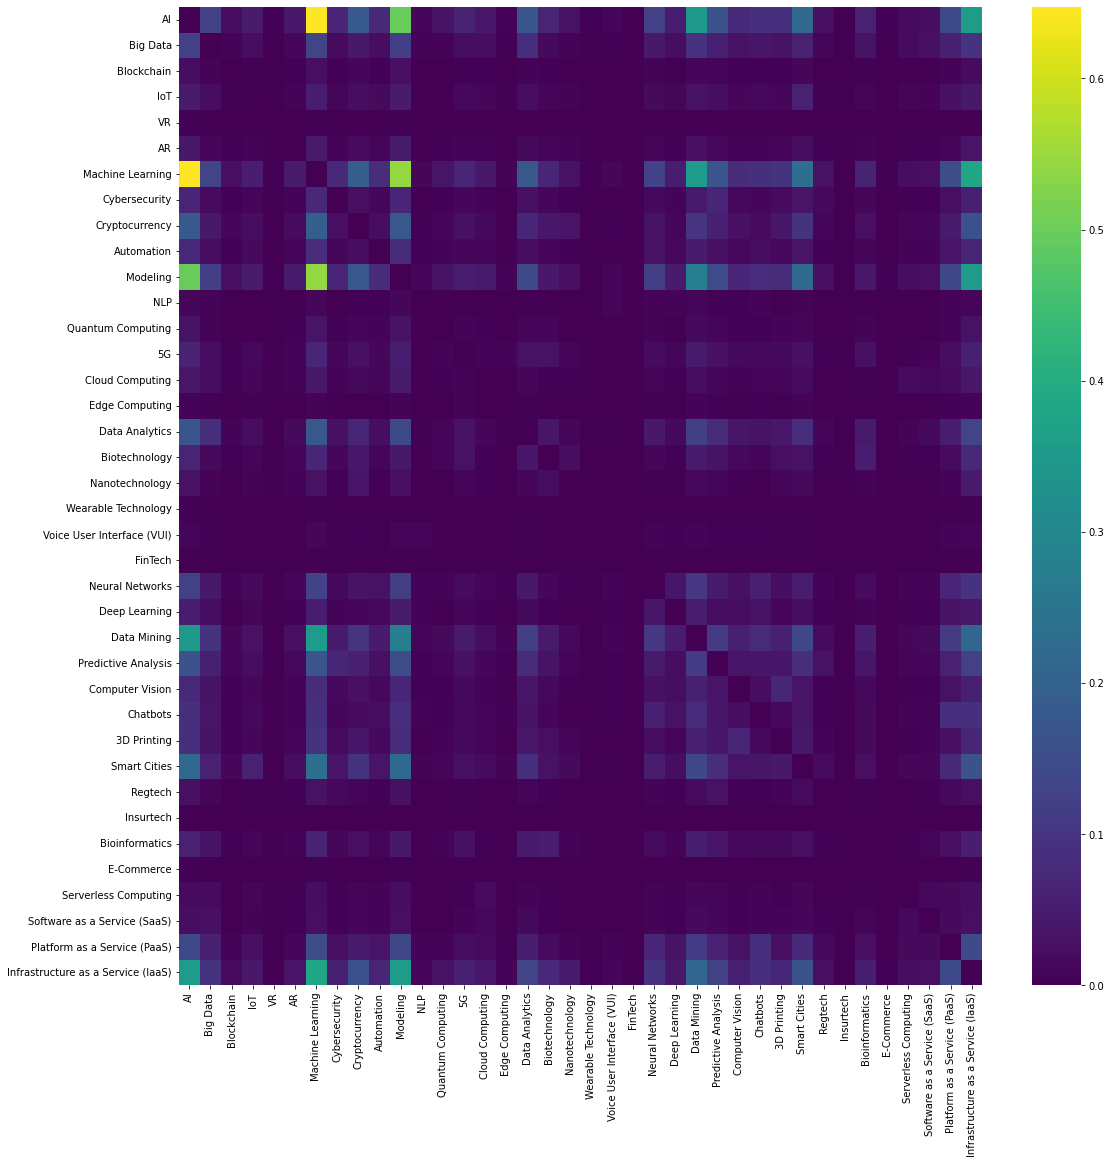

In [219]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(pair_df, cmap="viridis", xticklabels = words['topic'].tolist(), yticklabels = words['topic'].tolist())


In [215]:
words

,topic,keywords
0,AI,"[Reinforcement Learning, Supervised Learning, ..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain,"[Blockchain, Ethereum, Smart Contracts, Decent..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,VR,"[Virtual Reality, Immersive Gaming, Virtual To..."
5,AR,"[Google Glass, Microsoft HoloLens, AR in Marke..."
6,Machine Learning,"[Machine Learning, Scikit-Learn, TensorFlow, P..."
7,Cybersecurity,"[Cybersecurity, Ethical Hacking, Intrusion Det..."
8,Cryptocurrency,"[Cryptocurrency, Bitcoin, Ethereum, Litecoin, ..."
9,Automation,"[Automation, Industrial Automation, Home Autom..."
